# DeWatermark

In [76]:
import cv2
import numpy as np
from math import log10 , sqrt
import matplotlib.pyplot as plt

In [77]:
def calculate_MSE(first , second):
    return np.mean((first - second) ** 2)

In [78]:
def calculate_psnr(original, compared):
    mse = calculate_MSE(original , compared)
    if mse == 0 :
        return float('inf')
    return 20 * log10(255 / np.sqrt(mse))

In [79]:
def dewatermark(watermarked, watermark):
    ratio = 0.3
    alpha = watermark[: , : , 3]
    #alpha_for_watermark = alpha * 0.3
    alpha = alpha[: , : , np.newaxis]
    watermark_as_BGR = watermark[: , : , :3]
    deduction = watermarked - alpha * ratio * watermark_as_BGR
    denominator = 1 - alpha * ratio
    fraction = deduction / denominator
    reconstructed_image = np.clip(fraction , 0 , 1)
    
    return reconstructed_image

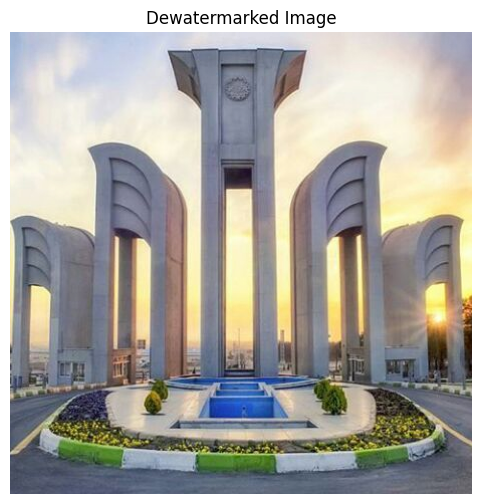

PSNR between dewatermarked and original: 107.34 dB


In [80]:
watermarked_path = "./images_part1/watermarked.png"
watermark_path = "./images_part1/iut.png"
original_path = "./images_part1/original.png"

watermarked = cv2.imread(watermarked_path).astype(np.float32) / 255.0
watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.0
original = cv2.imread(original_path).astype(np.float32) / 255.0

dewatermarked = dewatermark(watermarked, watermark)
psnr_value = calculate_psnr(original, dewatermarked)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(dewatermarked, cv2.COLOR_BGR2RGB))
plt.title('Dewatermarked Image')
plt.axis('off')
plt.show()

print(f"PSNR between dewatermarked and original: {psnr_value:.2f} dB")